# To predict:Survival or Deceased using Logistic Regression

### importing all libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading data

In [5]:
train=pd.read_csv("titanic_train.csv")

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory data analysis
### Checking missing data

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


#### Ploting null data as heatmap

<Axes: >

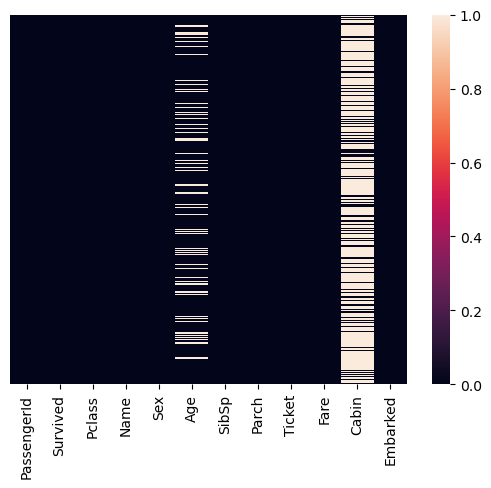

In [5]:
sns.heatmap(train.isnull(),yticklabels=False)

- got an idea about which columns have NaN values

## Analysis Data of survival

#### Checking servival status based on gender

<Axes: xlabel='Survived', ylabel='count'>

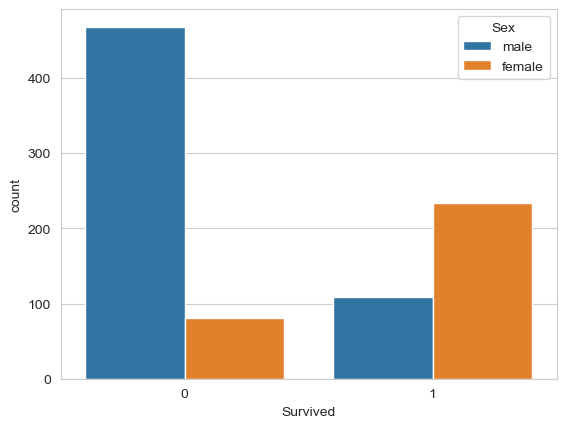

In [6]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Sex',data=train)

#### Checking survival status based on class of passanger

<Axes: xlabel='Survived', ylabel='count'>

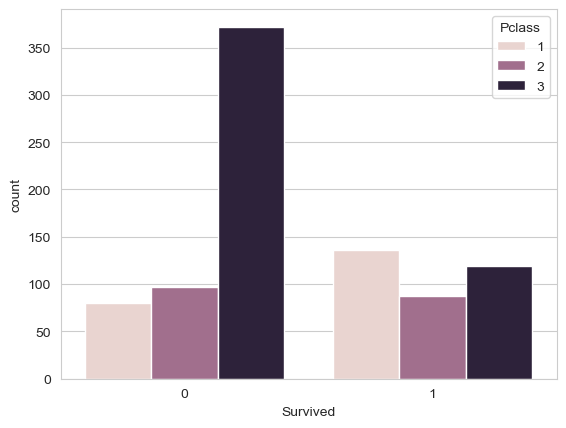

In [7]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Pclass',data=train)

#### Checking survival status based on age

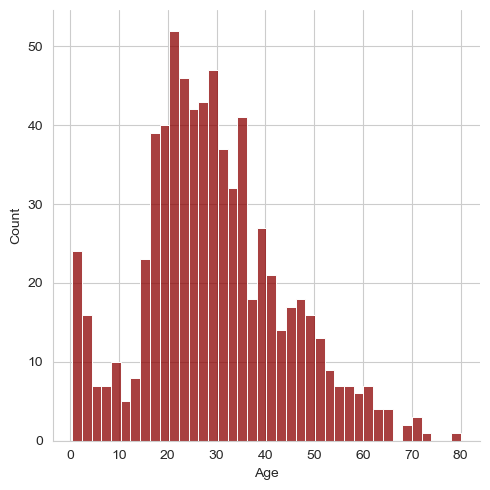

In [8]:
sns.displot(train['Age'],kde=False,color='darkred',bins=40)

## Data cleaning


### Will assign mean value to null values of Age column

#### Finding average age of each passanger class

<Axes: xlabel='Pclass', ylabel='Age'>

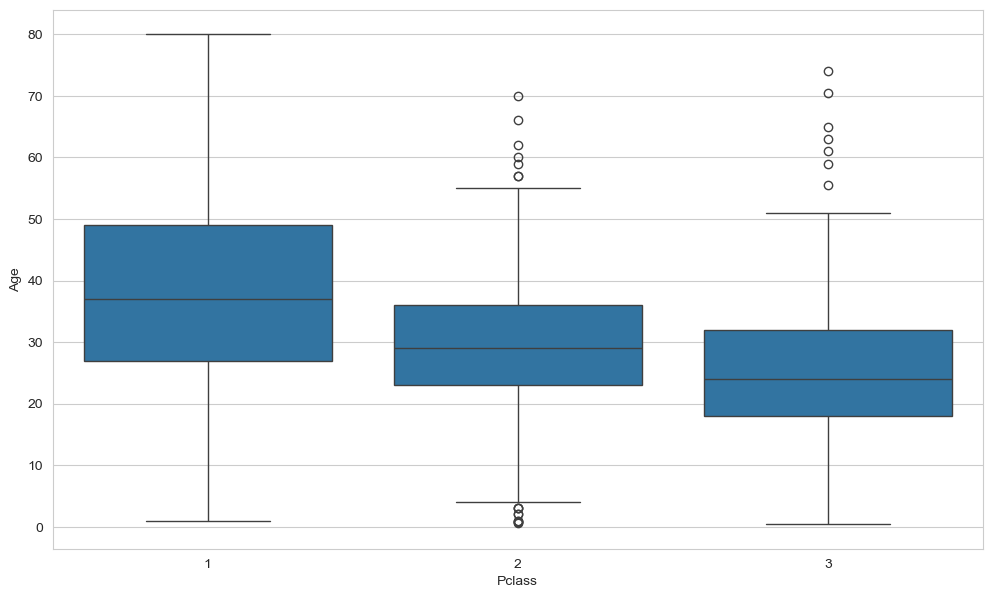

In [9]:

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

#### Will use this average age to impute what to fill in null columns ,by created an function named impute_age

In [10]:

def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
        
    else:
        return Age

#### Applying impute function on values of Age and Pclass columns

In [11]:

train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

/var/folders/lp/n5dyc7w95_zgfvvvpmkscmdh0000gn/T/ipykernel_30580/1457788682.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
/var/folders/lp/n5dyc7w95_zgfvvvpmkscmdh0000gn/T/ipykernel_30580/1457788682.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


#### Checking null values after data cleaning

<Axes: >

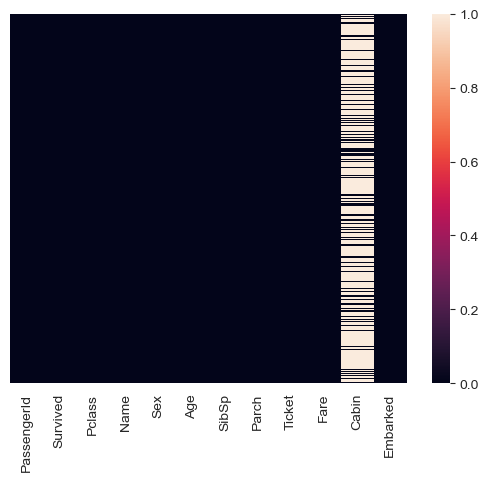

In [12]:
sns.heatmap(train.isnull(),yticklabels=False)

#### Droping the cabin column , as it has a lot of null values

In [13]:
train.drop('Cabin',axis=1,inplace=True)

#### Checking data after cleaning

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

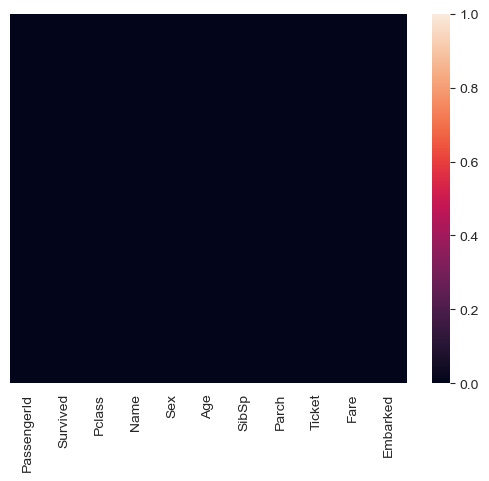

In [15]:
sns.heatmap(train.isnull(),yticklabels=False)

## Converting categoral features 

### Creating dummies

#### Creating dummies from 'Embarked' and 'Sex' columns

In [16]:

sex=pd.get_dummies(train['Sex'],drop_first=True)
Embark=pd.get_dummies(train['Embarked'],drop_first=True) #will drop first column of dummie

## Dropping unwanted columns

In [17]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


## Adding converted Catogoral Columns

In [19]:
train=pd.concat([train,sex,Embark],axis=1)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


- data is ready

## Making a logistic regression model

####  Train Test split

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

## Training 

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Prediction

In [24]:
predictions=logmodel.predict(X_test)

## Accuracy

In [25]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,predictions)

In [26]:
accuracy

array([[135,  19],
       [ 45,  69]])

## Accuracy Score

In [27]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7611940298507462

### Getting an accuracy on 76%

In [28]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

#### Saving the model

In [31]:
import pickle
with open("final_model.pkl", "wb") as f:
    pickle.dump(logmodel, f)

print("💾 Model saved as final_xgb_model.pkl")

💾 Model saved as final_xgb_model.pkl
